In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

sns.set(style='white')

## read and examine

In [2]:
data = pd.read_excel('../Data/credit_card_clients.xls', header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.rename({'default payment next month': 'Default'}, axis=1, inplace=True)

In [4]:
data.drop('ID', axis=1, inplace=True)
# data.describe(include='all')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
Default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [5]:
# data.groupby('Default').ID.count()

## missing data

In [6]:
data_no_missing = data.query("EDUCATION!=0 & MARRIAGE!=0")

## resample data

In [7]:
data_no_missing['Default'].value_counts()

0    23301
1     6631
Name: Default, dtype: int64

In [8]:
from sklearn.utils import resample

In [9]:
data_no_default = data_no_missing[data['Default']==0]
data_default = data_no_missing[data['Default']==1]

/Users/leo2018/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/leo2018/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
data_no_default_downsampled = resample(data_no_default,
                                       replace=False, 
                                       n_samples=1000, 
                                       random_state=42)
len(data_no_default_downsampled)

1000

In [11]:
data_default_downsampled = resample(data_default,
                                       replace=False, 
                                       n_samples=1000, 
                                       random_state=42)
len(data_default_downsampled)

1000

In [12]:
data_ana = pd.concat([data_no_default_downsampled, data_default_downsampled], ignore_index=True)
data_ana

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
1,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
2,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
3,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
4,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,30000,2,1,2,34,1,2,2,2,2,...,25624,25977,25413,1396,0,1967,903,0,1100,1
1996,320000,1,1,1,43,-1,0,0,0,0,...,31851,3105,-45,10000,5000,0,0,0,0,1
1997,50000,1,2,2,23,-1,-1,0,0,-1,...,11804,1420,0,15000,20300,9500,1420,0,0,1
1998,150000,2,3,1,43,0,0,0,0,0,...,22013,22449,22922,1973,1353,1366,802,833,837,1


## PCA(主成分分析)

In [13]:
X = data_ana.drop('Default', axis=1)
y = data_ana['Default']
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [14]:
X_encoding = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',])
X_encoding

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
0,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
1,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
2,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
3,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
4,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,30000,34,24022,24744,24053,25624,25977,25413,1396,0,...,0,0,0,0,1,0,0,0,0,0
1996,320000,43,18625,28143,32159,31851,3105,-45,10000,5000,...,0,0,0,1,0,0,0,0,0,0
1997,50000,23,2165,14796,20816,11804,1420,0,15000,20300,...,0,0,1,0,0,0,0,0,0,0
1998,150000,43,18308,19973,21000,22013,22449,22922,1973,1353,...,0,0,0,1,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import scale
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
clf_et = ExtraTreesClassifier()

In [17]:
clf_et.fit(scale(X_encoding), y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [18]:
ft_imp = clf_et.feature_importances_
pd.Series(ft_imp, index=X_encoding.columns).nlargest(10)

LIMIT_BAL    0.051191
AGE          0.049114
PAY_0_2      0.044733
BILL_AMT1    0.042626
PAY_AMT1     0.041734
BILL_AMT2    0.040801
BILL_AMT5    0.040690
BILL_AMT4    0.039784
BILL_AMT3    0.039197
BILL_AMT6    0.038257
dtype: float64

## scale & split data

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_encoding, y, random_state=42)

In [21]:
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

## SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

### SVC

In [23]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scale, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
pred = clf_svm.predict(X_test_scale)

In [25]:
confusion_matrix(y_test, pred)

array([[202,  55],
       [100, 143]])

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       257
           1       0.72      0.59      0.65       243

    accuracy                           0.69       500
   macro avg       0.70      0.69      0.69       500
weighted avg       0.69      0.69      0.69       500



In [27]:
accuracy_score(y_test, pred)

0.69

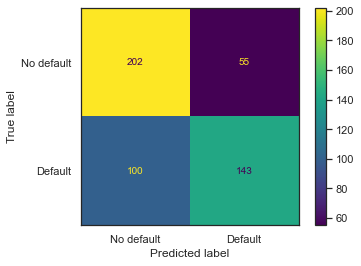

In [28]:
plot_confusion_matrix(clf_svm, X_test_scale, y_test, values_format='d',\
                      display_labels=['No default', 'Default'])

### GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
             'C': [0.5, 1, 10, 100],
             'gamma':[1, 0.1, 0.01, 0.001],
             'kernel': ['rbf'] 
}
best_model = GridSearchCV(
             SVC(),
             param_grid=param_grid,
             cv=5,
             scoring='accuracy',
             verbose=2
)

In [31]:
best_model.fit(X_train_scale, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.5, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   15.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [32]:
best_model.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
best_model.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [34]:
pred1 = best_model.predict(X_test_scale)

In [35]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73       257
           1       0.72      0.60      0.65       243

    accuracy                           0.69       500
   macro avg       0.70      0.69      0.69       500
weighted avg       0.70      0.69      0.69       500



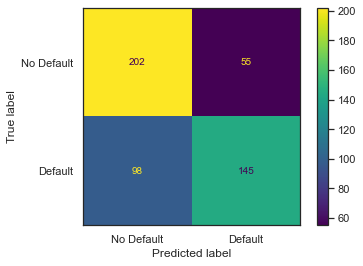

In [36]:
plot_confusion_matrix(best_model, X_test_scale, y_test, values_format='d',\
                      display_labels=['No Default', 'Default']) 

## XGBoost

In [37]:
from xgboost import XGBClassifier

In [38]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
pred2 = clf_xgb.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       257
           1       0.72      0.68      0.70       243

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.72      0.72      0.72       500



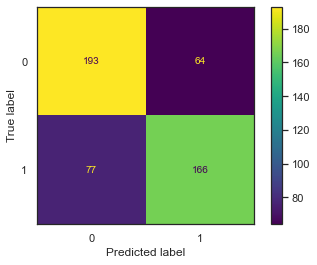

In [40]:
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d')